In [3]:
import warnings

warnings.simplefilter("ignore")

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ssb



In [8]:

accidentes = pd.read_csv("C:/Users/sergi/modalidad/DataSet/Accidentalidad_2019.csv",encoding='utf-8')


In [9]:
accidentes.head(5)

,X,Y,OBJECTID,RADICADO,HORA,DIA_NOMBRE,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,CBML,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,MES,DIA,FECHA,MES_NOMBRE
0,-75.596093,6.256489,709812,1674223,12:30:00 p. m.,DOMINGO,2019,Choque,CL 47 CR 78,CL 047 078 000 00000,1112,Malla vial cruce invertido,SOLO DAÑOS,El Velódromo,Laureles Estadio,Tramo de via,6,9,2019-06-09T00:00:00.000Z,JUNIO
1,-75.583161,6.250155,709813,1675562,6:50:00 p. m.,VIERNES,2019,Choque,CR 65 CL 45,CR 065 045 000 00000,1103,Malla vial,SOLO DAÑOS,Naranjal,Laureles Estadio,Lote o Predio,6,21,2019-06-21T00:00:00.000Z,JUNIO
2,-75.563856,6.250657,709814,1661788,8:50:00 a. m.,MIÉRCOLES,2019,Volcamiento,CR 46 CL 53,CR 046 053 000 00000,1019,Malla vial,HERIDO,La Candelaria,La Candelaria,Tramo de via,2,27,2019-02-27T00:00:00.000Z,FEBRERO
3,-75.576757,6.268025,709815,1675911,7:00:00 a. m.,MARTES,2019,Choque,CR 65 CL 67,CR 065 067 000 00000,0517,Malla vial,SOLO DAÑOS,Caribe,Castilla,Tramo de via,6,25,2019-06-25T00:00:00.000Z,JUNIO
4,-75.571897,6.202827,709816,1673388,11:30:00 a. m.,MARTES,2019,Choque,CR 43 A CL 1 A Sur,CR 043 A S 001 A 000 00000,1416,Malla vial,SOLO DAÑOS,Alejandría,El Poblado,Tramo de via,6,4,2019-06-04T00:00:00.000Z,JUNIO


Cambiamos el nombre de la columna DIA_NOMBRE por DIA_NUMERO

In [10]:
accidentes = accidentes.rename(columns={'DIA_NOMBRE':'DIA_NUMERO'})


Cambiando los valores de las columna DIA_NOMBRE por los dias numericos de la semana 1:7

In [11]:
accidentes.DIA_NUMERO = accidentes.DIA_NUMERO.str.replace('LUNES','1')
accidentes.DIA_NUMERO = accidentes.DIA_NUMERO.str.replace('MARTES', '2')
accidentes.DIA_NUMERO = accidentes.DIA_NUMERO.str.replace('MIÉRCOLES', '3')
accidentes.DIA_NUMERO = accidentes.DIA_NUMERO.str.replace('JUEVES', '4')
accidentes.DIA_NUMERO = accidentes.DIA_NUMERO.str.replace('VIERNES', '5')
accidentes.DIA_NUMERO = accidentes.DIA_NUMERO.str.replace('SÁBADO', '6')
accidentes.DIA_NUMERO = accidentes.DIA_NUMERO.str.replace('DOMINGO', '7')

In [12]:
accidentes['NUM_COMUNA'] = accidentes['COMUNA']

In [13]:
accidentes.head(10)

,X,Y,OBJECTID,RADICADO,HORA,DIA_NUMERO,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,...,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,MES,DIA,FECHA,MES_NOMBRE,NUM_COMUNA
0,-75.596093,6.256489,709812,1674223,12:30:00 p. m.,7,2019,Choque,CL 47 CR 78,CL 047 078 000 00000,...,Malla vial cruce invertido,SOLO DAÑOS,El Velódromo,Laureles Estadio,Tramo de via,6,9,2019-06-09T00:00:00.000Z,JUNIO,Laureles Estadio
1,-75.583161,6.250155,709813,1675562,6:50:00 p. m.,5,2019,Choque,CR 65 CL 45,CR 065 045 000 00000,...,Malla vial,SOLO DAÑOS,Naranjal,Laureles Estadio,Lote o Predio,6,21,2019-06-21T00:00:00.000Z,JUNIO,Laureles Estadio
2,-75.563856,6.250657,709814,1661788,8:50:00 a. m.,3,2019,Volcamiento,CR 46 CL 53,CR 046 053 000 00000,...,Malla vial,HERIDO,La Candelaria,La Candelaria,Tramo de via,2,27,2019-02-27T00:00:00.000Z,FEBRERO,La Candelaria
3,-75.576757,6.268025,709815,1675911,7:00:00 a. m.,2,2019,Choque,CR 65 CL 67,CR 065 067 000 00000,...,Malla vial,SOLO DAÑOS,Caribe,Castilla,Tramo de via,6,25,2019-06-25T00:00:00.000Z,JUNIO,Castilla
4,-75.571897,6.202827,709816,1673388,11:30:00 a. m.,2,2019,Choque,CR 43 A CL 1 A Sur,CR 043 A S 001 A 000 00000,...,Malla vial,SOLO DAÑOS,Alejandría,El Poblado,Tramo de via,6,4,2019-06-04T00:00:00.000Z,JUNIO,El Poblado
5,-75.576737,6.207613,709817,1666474,12:20:00 p. m.,5,2019,Choque,CR 48 CL 1,CR 048 001 000 00000,...,Malla vial,SOLO DAÑOS,Patio Bonito,El Poblado,Tramo de via,4,5,2019-04-05T00:00:00.000Z,ABRIL,El Poblado
6,-75.609766,6.257146,709818,1660673,3:00:00 a. m.,1,2019,Choque,CR 93 CL 47 B,CR 093 047 B 000 00000,...,Malla vial,SOLO DAÑOS,Santa Lucía,La América,Tramo de via,2,18,2019-02-18T00:00:00.000Z,FEBRERO,La América
7,-75.563572,6.293681,709819,1655464,2:30:00 a. m.,2,2019,Caida Ocupante,CR 63 CL 101 C,CR 063 101 C 000 00000,...,Malla vial,HERIDO,Belalcázar,Castilla,Tramo de via,1,1,2019-01-01T00:00:00.000Z,ENERO,Castilla
8,-75.571333,6.255336,709820,1672593,5:30:00 p. m.,3,2019,Volcamiento,CL 55 CR 56,CL 055 056 000 00000,...,Malla vial,HERIDO,San Benito,La Candelaria,Tramo de via,5,29,2019-05-29T00:00:00.000Z,MAYO,La Candelaria
9,-75.576701,6.243748,709821,1669539,9:00:00 a. m.,5,2019,Choque,CR 57 CL 42,CR 057 042 000 00000,...,Malla vial,SOLO DAÑOS,La Alpujarra,La Candelaria,Tramo de via,5,3,2019-05-03T00:00:00.000Z,MAYO,La Candelaria


Cambiamos los valores de la columna COMUNA y los pasamos por su representación numerica

Nota importante : a los corregimientos tambien se le asignaron un numero, despues del 17

In [16]:
accidentes.NUM_COMUNA = accidentes.NUM_COMUNA.replace({"Popular":1, "Santa Cruz":2, "Manrique": 3 , "Aranjuez":4, "Castilla":5,
                                               "Doce de Octubre":6, "Robledo":7, "Villa Hermosa":8, "Buenos Aires":9,
                                               "La Candelaria": 10, "Laureles Estadio": 11, "La América":12, "San Javier": 13,
                                              "El Poblado": 14, "Guayabal":15, "Belén":16 , "Corregimiento de Santa Elena":17,
                                              "Corregimiento de Altavista":18, "Corregimiento de San Sebastián de Palmitas":19,
                                              "Corregimiento de San Antonio de Prado":20, "Corregimiento de San Cristóbal":21})

Eliminamos las filas que contenian datos vacios, para contar con la misma dimension de los mismos

In [18]:
#Eliminamos las filas de las columnas que no tienen información   
accidentes = accidentes.drop(accidentes[accidentes['COMUNA']=='Sin Inf'].index)

accidentes.drop(accidentes[accidentes.CBML.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.BARRIO.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.COMUNA.isnull()].index, inplace = True)

accidentes.shape

(30862, 21)

In [20]:
accidentes['NUM_COMUNA'].unique()

array([11, 10, 5, 14, 12, 15, 20, 9, 4, 2, 7, 21, 16, 8, 6, 3, 13, 1, 17,
       18, 19], dtype=object)

cambiamos el tipo de dato de Object a int en las columnas DIA_NUMERO,CBML,NUM_COMUNA

In [22]:
accidentes[['DIA_NUMERO','CBML','NUM_COMUNA']] = accidentes[['DIA_NUMERO','CBML','NUM_COMUNA']].astype('int64')

In [23]:
accidentes.columns

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'HORA', 'DIA_NUMERO', 'PERIODO',
       'CLASE', 'DIRECCION', 'DIRECCION_ENC', 'CBML', 'TIPO_GEOCOD',
       'GRAVEDAD', 'BARRIO', 'COMUNA', 'DISENO', 'MES', 'DIA', 'FECHA',
       'MES_NOMBRE', 'NUM_COMUNA'],
      dtype='object')

In [24]:
accidentes.shape

(30862, 21)

In [25]:
columna_fecha = accidentes['FECHA']
columna_fecha

0        2019-06-09T00:00:00.000Z
1        2019-06-21T00:00:00.000Z
2        2019-02-27T00:00:00.000Z
3        2019-06-25T00:00:00.000Z
4        2019-06-04T00:00:00.000Z
                   ...           
30902    2019-08-06T00:00:00.000Z
30903    2019-07-05T00:00:00.000Z
30904    2019-08-23T00:00:00.000Z
30905    2019-07-19T00:00:00.000Z
30906    2019-07-29T00:00:00.000Z
Name: FECHA, Length: 30862, dtype: object

In [26]:
columna_hora = accidentes['HORA']
columna_hora

0        12:30:00 p. m.
1         6:50:00 p. m.
2         8:50:00 a. m.
3         7:00:00 a. m.
4        11:30:00 a. m.
              ...      
30902    09:40:00 p. m.
30903    07:55:00 a. m.
30904    02:40:00 a. m.
30905    09:30:00 a. m.
30906    04:40:00 p. m.
Name: HORA, Length: 30862, dtype: object

In [27]:
linea = accidentes.loc[10,:]
linea

X                                -75.5715
Y                                 6.24505
OBJECTID                           709822
RADICADO                          1664436
HORA                        1:00:00 p. m.
DIA_NUMERO                              3
PERIODO                              2019
CLASE                              Choque
DIRECCION                     CL 44 CR 52
DIRECCION_ENC    CL  044   052  000 00000
CBML                                 1007
TIPO_GEOCOD                    Malla vial
GRAVEDAD                       SOLO DAÑOS
BARRIO                          Guayaquil
COMUNA                      La Candelaria
DISENO                       Interseccion
MES                                     3
DIA                                    20
FECHA            2019-03-20T00:00:00.000Z
MES_NOMBRE                     MARZO     
NUM_COMUNA                             10
Name: 10, dtype: object

In [28]:
accidentes['DIA_NUMERO']

0        7
1        5
2        3
3        2
4        2
        ..
30902    2
30903    5
30904    5
30905    5
30906    1
Name: DIA_NUMERO, Length: 30862, dtype: int64

# Inspeccionar nuestros datos

In [29]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30862 entries, 0 to 30906
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              30862 non-null  float64
 1   Y              30862 non-null  float64
 2   OBJECTID       30862 non-null  int64  
 3   RADICADO       30862 non-null  int64  
 4   HORA           30862 non-null  object 
 5   DIA_NUMERO     30862 non-null  int64  
 6   PERIODO        30862 non-null  int64  
 7   CLASE          30862 non-null  object 
 8   DIRECCION      30862 non-null  object 
 9   DIRECCION_ENC  30862 non-null  object 
 10  CBML           30862 non-null  int64  
 11  TIPO_GEOCOD    30862 non-null  object 
 12  GRAVEDAD       30862 non-null  object 
 13  BARRIO         30862 non-null  object 
 14  COMUNA         30862 non-null  object 
 15  DISENO         30862 non-null  object 
 16  MES            30862 non-null  int64  
 17  DIA            30862 non-null  int64  
 18  FECHA 

Columnas numericas y columnas de texto



In [30]:
(accidentes.dtypes != object)


X                 True
Y                 True
OBJECTID          True
RADICADO          True
HORA             False
DIA_NUMERO        True
PERIODO           True
CLASE            False
DIRECCION        False
DIRECCION_ENC    False
CBML              True
TIPO_GEOCOD      False
GRAVEDAD         False
BARRIO           False
COMUNA           False
DISENO           False
MES               True
DIA               True
FECHA            False
MES_NOMBRE       False
NUM_COMUNA        True
dtype: bool

In [31]:
accidentes.dtypes == object


X                False
Y                False
OBJECTID         False
RADICADO         False
HORA              True
DIA_NUMERO       False
PERIODO          False
CLASE             True
DIRECCION         True
DIRECCION_ENC     True
CBML             False
TIPO_GEOCOD       True
GRAVEDAD          True
BARRIO            True
COMUNA            True
DISENO            True
MES              False
DIA              False
FECHA             True
MES_NOMBRE        True
NUM_COMUNA       False
dtype: bool

In [32]:
num = (accidentes.dtypes != object )
num.index

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'HORA', 'DIA_NUMERO', 'PERIODO',
       'CLASE', 'DIRECCION', 'DIRECCION_ENC', 'CBML', 'TIPO_GEOCOD',
       'GRAVEDAD', 'BARRIO', 'COMUNA', 'DISENO', 'MES', 'DIA', 'FECHA',
       'MES_NOMBRE', 'NUM_COMUNA'],
      dtype='object')

In [33]:
for i in num.index:
    print(i)

X
Y
OBJECTID
RADICADO
HORA
DIA_NUMERO
PERIODO
CLASE
DIRECCION
DIRECCION_ENC
CBML
TIPO_GEOCOD
GRAVEDAD
BARRIO
COMUNA
DISENO
MES
DIA
FECHA
MES_NOMBRE
NUM_COMUNA


In [34]:
num_cols = [c for c in num.index if num[c]]

In [35]:
num_cols

['X',
 'Y',
 'OBJECTID',
 'RADICADO',
 'DIA_NUMERO',
 'PERIODO',
 'CBML',
 'MES',
 'DIA',
 'NUM_COMUNA']

In [36]:
accidentes.dtypes == object

X                False
Y                False
OBJECTID         False
RADICADO         False
HORA              True
DIA_NUMERO       False
PERIODO          False
CLASE             True
DIRECCION         True
DIRECCION_ENC     True
CBML             False
TIPO_GEOCOD       True
GRAVEDAD          True
BARRIO            True
COMUNA            True
DISENO            True
MES              False
DIA              False
FECHA             True
MES_NOMBRE        True
NUM_COMUNA       False
dtype: bool

In [37]:
obj = (accidentes.dtypes == object)
obj_cols =  [c for c in obj.index if obj[c]]

In [38]:
obj_cols

['HORA',
 'CLASE',
 'DIRECCION',
 'DIRECCION_ENC',
 'TIPO_GEOCOD',
 'GRAVEDAD',
 'BARRIO',
 'COMUNA',
 'DISENO',
 'FECHA',
 'MES_NOMBRE']

In [39]:
accidentes_num = accidentes[num_cols]
accidentes_obj = accidentes[obj_cols]

In [40]:
accidentes_obj.to_csv("C:/Users/sergi/modalidad/Dataset/accidentes_obj.csv",index = False)

# Estadisticas de las columnas

In [41]:
accidentes_num.describe()

,X,Y,OBJECTID,RADICADO,DIA_NUMERO,PERIODO,CBML,MES,DIA,NUM_COMUNA
count,30862.000000,30862.000000,30862.000000,3.086200e+04,30862.000000,30862.0,3.086200e+04,30862.000000,30862.000000,30862.000000
mean,-75.576762,6.249781,725555.244249,1.672449e+06,3.824866,2019.0,4.521071e+06,5.271078,15.540503,9.960664
std,0.019582,0.028669,9714.995802,9.837798e+03,1.905230,0.0,1.760085e+08,2.589672,8.673975,4.302420
min,-75.701661,6.167576,708812.000000,1.655108e+06,1.000000,2019.0,1.000000e+01,1.000000,1.000000,1.000000
25%,-75.586115,6.231884,717153.500000,1.663925e+06,2.000000,2019.0,7.010000e+02,3.000000,8.000000,7.000000
50%,-75.574435,6.249715,725467.500000,1.672466e+06,4.000000,2019.0,1.013000e+03,5.000000,15.000000,10.000000
75%,-75.564609,6.270452,734035.750000,1.680978e+06,5.000000,2019.0,1.403000e+03,8.000000,23.000000,14.000000
max,-75.504666,6.368394,742352.000000,1.689537e+06,7.000000,2019.0,9.140040e+09,9.000000,31.000000,21.000000


# Observando los datos con graficos

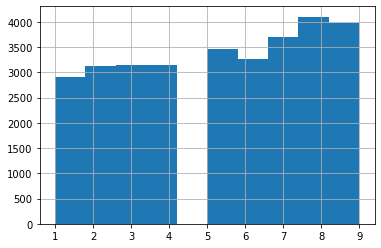

In [56]:
accidentes_num['MES'].hist()

In [43]:



for i in range(12):
       
    meses = (accidentes_num['MES'] == i+1 ).value_counts()
    print(f'mes {i}\n {meses}\n ')
           


mes 0
 False    27945
True      2917
Name: MES, dtype: int64
 
mes 1
 False    27732
True      3130
Name: MES, dtype: int64
 
mes 2
 False    27711
True      3151
Name: MES, dtype: int64
 
mes 3
 False    27709
True      3153
Name: MES, dtype: int64
 
mes 4
 False    27391
True      3471
Name: MES, dtype: int64
 
mes 5
 False    27601
True      3261
Name: MES, dtype: int64
 
mes 6
 False    27164
True      3698
Name: MES, dtype: int64
 
mes 7
 False    26760
True      4102
Name: MES, dtype: int64
 
mes 8
 False    26883
True      3979
Name: MES, dtype: int64
 
mes 9
 False    30862
Name: MES, dtype: int64
 
mes 10
 False    30862
Name: MES, dtype: int64
 
mes 11
 False    30862
Name: MES, dtype: int64
 


In [44]:
accidentes.shape

(30862, 21)

# Buscando datos faltantes (nulos o NaN)

In [45]:
accidentes_num.notnull().apply(pd.Series.value_counts)

,X,Y,OBJECTID,RADICADO,DIA_NUMERO,PERIODO,CBML,MES,DIA,NUM_COMUNA
True,30862,30862,30862,30862,30862,30862,30862,30862,30862,30862


In [46]:
(accidentes_num != 0).apply(pd.Series.value_counts)

,X,Y,OBJECTID,RADICADO,DIA_NUMERO,PERIODO,CBML,MES,DIA,NUM_COMUNA
True,30862,30862,30862,30862,30862,30862,30862,30862,30862,30862


In [47]:
from sklearn.impute import SimpleImputer as Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean')

In [48]:
values = imputer.fit_transform(accidentes_num)

In [49]:
#Array numpy

accidentes_num.values


array([[-7.55960929e+01,  6.25648935e+00,  7.09812000e+05, ...,
         6.00000000e+00,  9.00000000e+00,  1.10000000e+01],
       [-7.55831606e+01,  6.25015530e+00,  7.09813000e+05, ...,
         6.00000000e+00,  2.10000000e+01,  1.10000000e+01],
       [-7.55638558e+01,  6.25065673e+00,  7.09814000e+05, ...,
         2.00000000e+00,  2.70000000e+01,  1.00000000e+01],
       ...,
       [-7.55542974e+01,  6.30033736e+00,  7.41809000e+05, ...,
         8.00000000e+00,  2.30000000e+01,  2.00000000e+00],
       [-7.56025386e+01,  6.24321643e+00,  7.41810000e+05, ...,
         7.00000000e+00,  1.90000000e+01,  1.10000000e+01],
       [-7.55612869e+01,  6.29231249e+00,  7.41811000e+05, ...,
         7.00000000e+00,  2.90000000e+01,  2.00000000e+00]])

In [50]:
x = pd.DataFrame(values)

In [51]:
x.columns = accidentes_num.columns

In [52]:
x.index = accidentes_num.index

In [53]:
x.head()

,X,Y,OBJECTID,RADICADO,DIA_NUMERO,PERIODO,CBML,MES,DIA,NUM_COMUNA
0,-75.596093,6.256489,709812.0,1674223.0,7.0,2019.0,1112.0,6.0,9.0,11.0
1,-75.583161,6.250155,709813.0,1675562.0,5.0,2019.0,1103.0,6.0,21.0,11.0
2,-75.563856,6.250657,709814.0,1661788.0,3.0,2019.0,1019.0,2.0,27.0,10.0
3,-75.576757,6.268025,709815.0,1675911.0,2.0,2019.0,517.0,6.0,25.0,5.0
4,-75.571897,6.202827,709816.0,1673388.0,2.0,2019.0,1416.0,6.0,4.0,14.0


In [57]:
x.to_csv("C:/Users/sergi/modalidad/Dataset/X.csv",index = False)